In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [2]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2025-07-15 14:48:31.017810: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-15 14:48:31.029426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752590911.043146   20681 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752590911.047031   20681 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-15 14:48:31.060103: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
from tensorflow.keras.preprocessing.image import load_img

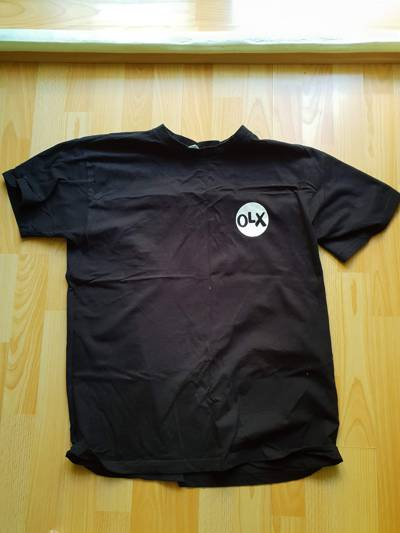

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1752590912.736945   20681 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78669 MB memory:  -> device: 0, name: NVIDIA H100 80GB HBM3, pci bus id: 0000:0f:00.0, compute capability: 9.0


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
pred = model.predict(X)

I0000 00:00:1752590915.388991   20744 service.cc:148] XLA service 0x7fcda40368e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752590915.389015   20744 service.cc:156]   StreamExecutor device (0): NVIDIA H100 80GB HBM3, Compute Capability 9.0
2025-07-15 14:48:35.411601: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752590915.636608   20744 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-15 14:48:36.575804: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


I0000 00:00:1752590917.084362   20744 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6816019)),
  ('n02916936', 'bulletproof_vest', np.float32(0.03819451)),
  ('n04370456', 'sweatshirt', np.float32(0.034335777)),
  ('n03710637', 'maillot', np.float32(0.011390353)),
  ('n04525038', 'velvet', np.float32(0.0018496467))]]

Recap of Lesson:

- Select Xception Model
- Preprocess Image
- Run Prediction
- Decord Predictions which assigns class to each line

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

Filters get more complex after each layer.

Vector Representation -> 1d Array turns an Image into a vector. Captures all of the features from the image.

Build Dense Layers after this to make the Final Prediction

Softmax -> Generalisation of Logistic Regression to Allow MultiClass Classification

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
X, y = next(train_ds)

In [20]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [23]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-07-15 14:48:40.809837: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 92 bytes spill stores, 92 bytes spill loads

2025-07-15 14:48:40.818457: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 384 bytes spill stores, 384 bytes spill loads

E0000 00:00:1752590921.771687   20744 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a miss

 1/96 ━━━━━━━━━━━━━━━━━━━━ 17:58 11s/step - accuracy: 0.0000e+00 - loss: 2.7876

2025-07-15 14:48:50.178919: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 16 bytes spill stores, 16 bytes spill loads

2025-07-15 14:48:50.179795: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 112 bytes spill stores, 112 bytes spill loads

2025-07-15 14:48:50.263512: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 344 bytes spill stores, 308 bytes spill loads

E0000 00:00:1752590931.105506   20740 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752590931.222238   20740 gpu_timer.cc:82] Delay kernel timed out: measured time 

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5662 - loss: 1.8564

2025-07-15 14:49:04.007361: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1042', 16 bytes spill stores, 16 bytes spill loads

2025-07-15 14:49:04.146322: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1042', 112 bytes spill stores, 112 bytes spill loads

2025-07-15 14:49:04.194972: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1042', 196 bytes spill stores, 196 bytes spill loads

E0000 00:00:1752590944.920494   20739 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752590945.036647   20739 gpu_timer.cc:82] Delay kernel timed out: measured time 

96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 227ms/step - accuracy: 0.5672 - loss: 1.8513 - val_accuracy: 0.7419 - val_loss: 0.9733
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8360 - loss: 0.5411 - val_accuracy: 0.7067 - val_loss: 1.2796
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8805 - loss: 0.3430 - val_accuracy: 0.7537 - val_loss: 0.9502
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9254 - loss: 0.2026 - val_accuracy: 0.7830 - val_loss: 0.9601
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9230 - loss: 0.2081 - val_accuracy: 0.7830 - val_loss: 0.9735
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9475 - loss: 0.1469 - val_accuracy: 0.7683 - val_loss: 1.0826
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9795 - loss: 0.0649 - val_accuracy: 0.8387 - val_loss: 0.8584
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9859 - loss: 0.0436 - val_accuracy: 0.8387 - val_loss: 

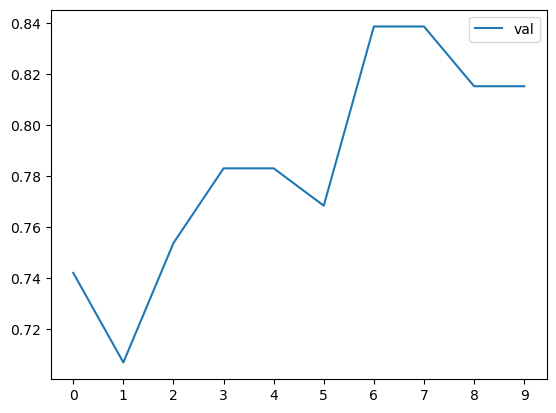

In [25]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [26]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [27]:
# Dictionary to store history with different learning rates
scores = {}

# List of learning rates
lrs = [0.0001, 0.001, 0.01, 0.1]

for lr in lrs:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.3563 - loss: 1.9925 - val_accuracy: 0.5103 - val_loss: 1.5170
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5383 - loss: 1.4193 - val_accuracy: 0.6452 - val_loss: 1.2093
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6350 - loss: 1.1510 - val_accuracy: 0.6921 - val_loss: 1.0464
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7017 - loss: 0.9868 - val_accuracy: 0.7185 - val_loss: 0.9541
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.7171 - loss: 0.9136 - val_accuracy: 0.7478 - val_loss: 0.8828
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7434 - loss: 0.8217 - val_accuracy: 0.7478 - val_loss: 0.8359
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7492 - loss: 0.7813 - val_accuracy: 0.7654 - val_loss: 0.7925
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7600 - loss: 0.7498 - val_accuracy: 0.

In [28]:
del scores[0.1]
del scores[0.0001]

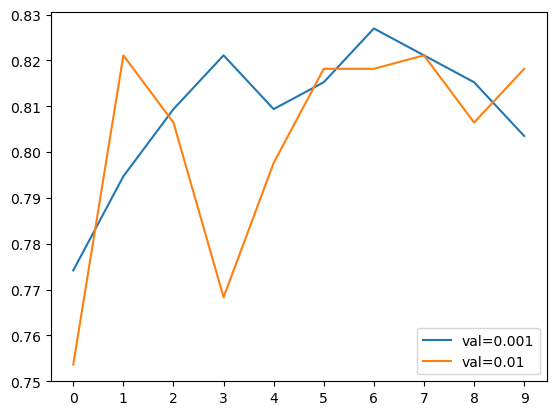

In [29]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [30]:
learning_rate = 0.001

Learning Rate 0.001 regularly more accurate than Learning Rate 0.01 across epoch's.

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [31]:
model.save_weights('model_v1.weights.h5')

In [32]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [33]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.5233 - loss: 1.4213 - val_accuracy: 0.7918 - val_loss: 0.7238
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7769 - loss: 0.6512 - val_accuracy: 0.7977 - val_loss: 0.6429
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8293 - loss: 0.5157 - val_accuracy: 0.8182 - val_loss: 0.6008
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8647 - loss: 0.4097 - val_accuracy: 0.8065 - val_loss: 0.5666
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8930 - loss: 0.3489 - val_accuracy: 0.8094 - val_loss: 0.5562
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9132 - loss: 0.3228 - val_accuracy: 0.8182 - val_loss: 0.5415
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9319 - loss: 0.2749 - val_accuracy: 0.8270 - val_loss: 0.5303
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9355 - loss: 0.2475 - val_accuracy: 0.8270 - 

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [34]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [35]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.4107 - loss: 1.7485 - val_accuracy: 0.6364 - val_loss: 1.1236
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6861 - loss: 0.9939 - val_accuracy: 0.7009 - val_loss: 0.8797
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.7623 - loss: 0.7478 - val_accuracy: 0.7273 - val_loss: 0.7756
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7942 - loss: 0.6317 - val_accuracy: 0.7507 - val_loss: 0.6934
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8266 - loss: 0.5278 - val_accuracy: 0.7566 - val_loss: 0.6563
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8593 - loss: 0.4670 - val_accuracy: 0.7683 - val_loss: 0.6479
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8639 - loss: 0.4286 - val_accuracy: 0.7742 - val_loss: 0.6132
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9037 - loss: 0.3459 - val_accuracy: 0.7771

2025-07-15 14:54:33.787313: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 192 bytes spill stores, 192 bytes spill loads



30/96 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4485 - loss: 1.6888

2025-07-15 14:54:37.135908: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 164 bytes spill stores, 164 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5736 - loss: 1.2892

2025-07-15 14:54:43.679072: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 52 bytes spill stores, 52 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.5746 - loss: 1.2860 - val_accuracy: 0.7537 - val_loss: 0.7455
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8152 - loss: 0.5497 - val_accuracy: 0.8211 - val_loss: 0.6481
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8913 - loss: 0.3478 - val_accuracy: 0.8328 - val_loss: 0.5798
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9264 - loss: 0.2444 - val_accuracy: 0.7947 - val_loss: 0.5919
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9614 - loss: 0.1718 - val_accuracy: 0.8094 - val_loss: 0.5569
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9673 - loss: 0.1254 - val_accuracy: 0.8211 - val_loss: 0.5886
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9862 - loss: 0.0910 - val_accuracy: 0.8387 - val_loss: 0.5864
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9969 - loss: 0.0549 - val_accuracy: 0.8211 - val_loss: 

2025-07-15 14:55:22.172111: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 192 bytes spill stores, 192 bytes spill loads

2025-07-15 14:55:22.686839: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3758', 112 bytes spill stores, 112 bytes spill loads

2025-07-15 14:55:23.057572: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3758', 484 bytes spill stores, 484 bytes spill loads



23/96 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4333 - loss: 1.8415

2025-07-15 14:55:25.832400: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3751', 164 bytes spill stores, 164 bytes spill loads

2025-07-15 14:55:26.728545: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3758', 120 bytes spill stores, 120 bytes spill loads

2025-07-15 14:55:26.794890: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3758', 460 bytes spill stores, 460 bytes spill loads



95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5869 - loss: 1.2719

2025-07-15 14:55:33.301327: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1044', 52 bytes spill stores, 52 bytes spill loads

2025-07-15 14:55:33.502223: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1051', 120 bytes spill stores, 120 bytes spill loads

2025-07-15 14:55:33.578004: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1051', 452 bytes spill stores, 452 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.5889 - loss: 1.2648 - val_accuracy: 0.7771 - val_loss: 0.6635
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8537 - loss: 0.4247 - val_accuracy: 0.7889 - val_loss: 0.5873
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9186 - loss: 0.2481 - val_accuracy: 0.8123 - val_loss: 0.6158
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9454 - loss: 0.1734 - val_accuracy: 0.8065 - val_loss: 0.6573
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9772 - loss: 0.0861 - val_accuracy: 0.8240 - val_loss: 0.6486
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9895 - loss: 0.0506 - val_accuracy: 0.8211 - val_loss: 0.6551
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9931 - loss: 0.0305 - val_accuracy: 0.8328 - val_loss: 0.6236
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9995 - loss: 0.0118 - val_accuracy: 0.8270 - val_loss: 

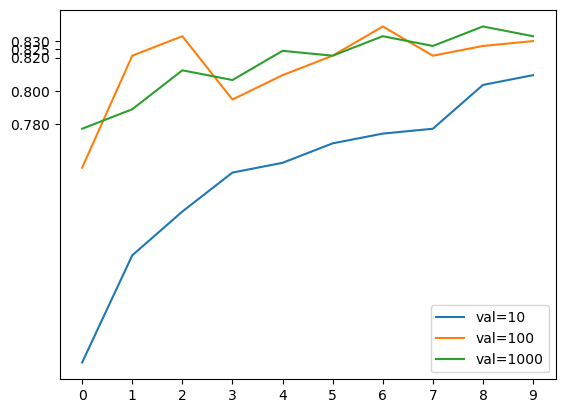

In [36]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

Adding Inner Dense Layer doesn't significantly improve Model Performance.

## Regularisation and Dropout

Add Dropout after Inner Layer. 

This means that for each training iteration, a certain percentage of neurons are ignored, effectively creating a smaller, simpler network. This helps the network generalize better to unseen data and reduces reliance on specific neurons, leading to improved performance on new inputs. 

In [37]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5 ):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [48]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.2, 0.5]:
    print(droprate)

    model = make_model(learning_rate=learning_rate, 
                       size_inner=size,
                       droprate=droprate
                      )
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.2
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.5521 - loss: 1.3351 - val_accuracy: 0.8152 - val_loss: 0.6377
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8029 - loss: 0.6152 - val_accuracy: 0.8094 - val_loss: 0.6066
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8467 - loss: 0.4486 - val_accuracy: 0.8006 - val_loss: 0.6215
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8874 - loss: 0.3356 - val_accuracy: 0.7947 - val_loss: 0.6185
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9179 - loss: 0.2635 - val_accuracy: 0.8211 - val_loss: 0.5609
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9401 - loss: 0.2015 - val_accuracy: 0.8328 - val_loss: 0.5237
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9461 - loss: 0.1832 - val_accuracy: 0.8328 - val_loss: 0.5678
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9646 - loss: 0.1315 - val_accuracy: 0.829

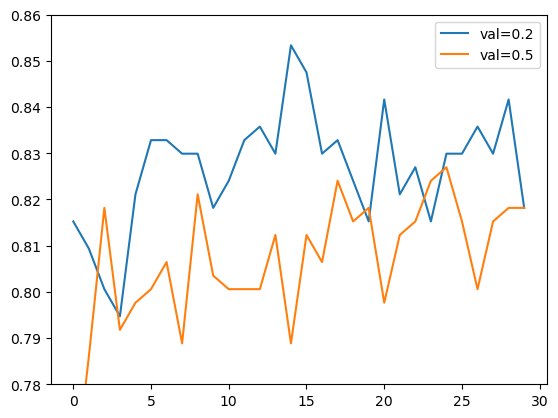

In [51]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78,0.86)
plt.legend()

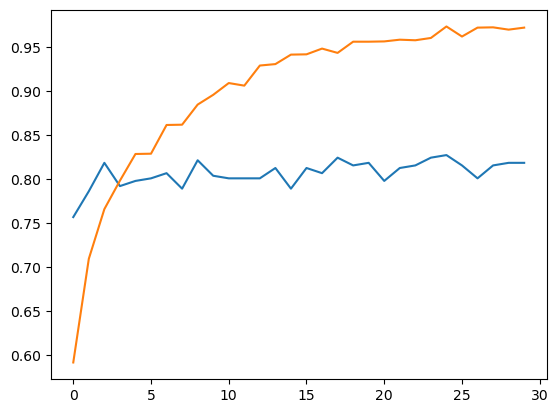

In [60]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=f'val={hist}')
plt.plot(hist['accuracy'], label=f'train={hist}')
plt.show()

## Data Augmentation

Pre-created functions available in Keras in order to be able to make transformations to images.

Types of transformations available:
- Flip
- Rotate
- Shift
- Shear
- Zoom
- Brightness
- Contrast

**Process**

- Use your own judgement
- Look at the Dataset and see what kind of variations there are
- Are objects always centred? etc etc

Tune variable as hyperparameter:
- Train it for 10-20 epochs -> see if model performs better
- If Model is Better Use it, If not Don't Use it
- If Model performs similarly -> Train for 10-20 more epochs and use if perfoms better

TUNE ONLY THE TRAINING DATASET

In [63]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small/train',
                                         target_size=(150,150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [65]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.4378 - loss: 1.7103 - val_accuracy: 0.7038 - val_loss: 0.9008
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.6412 - loss: 1.0815 - val_accuracy: 0.7419 - val_loss: 0.7762
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.6949 - loss: 0.9535 - val_accuracy: 0.7625 - val_loss: 0.7162
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.6822 - loss: 0.9185 - val_accuracy: 0.7478 - val_loss: 0.7101
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.7232 - loss: 0.8314 - val_accuracy: 0.7713 - val_loss: 0.6933
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7460 - loss: 0.7698 - val_accuracy: 0.7683 - val_loss: 0.6784
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.7568 - loss: 0.6969 - val_accuracy: 0.7771 - val_loss: 0.6877
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.7702 - loss: 0.7011 - val_accu

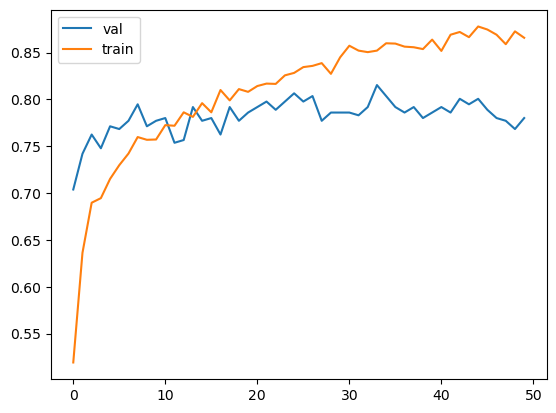

In [67]:
hist = history.history

plt.plot(hist['val_accuracy'], label = 'val')
plt.plot(hist['accuracy'], label = 'train')

plt.legend()

## Training a Larger Model

- Training a 299x299 Model

GPU Ran Out -> unable to carry this out

## Using Model

Restart Kernel

In [4]:
import tensorflow as tf
from tensorflow import keras

In [3]:
model = keras.models.load_model('xception_v1_10_0.833.keras')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [23]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [6]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Path of test images directory
test_imgs_dir = './clothing-dataset-small/test'

# Load in test images to generator
test_ds = test_gen.flow_from_directory(directory=test_imgs_dir,
                                       target_size=(150,150),
                                       batch_size=32,
                                       shuffle=False)

Found 372 images belonging to 10 classes.


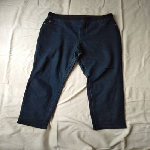

In [7]:
from tensorflow.keras.preprocessing.image import load_img 

image_size = (150, 150)
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(image_size))
img

In [12]:
import numpy as np
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [14]:
pred = model.predict(X)
pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([-4.4155912 , -5.9664707 , -2.327256  , -2.985509  ,  5.248825  ,
       -4.2974324 , -5.7557254 ,  0.26266557, -7.012305  , -4.642781  ],
      dtype=float32)

In [20]:
#To the actual class, we need to see what's the biggest value. We do it by using argmax:

pred[0].argmax()

np.int64(4)

In [24]:
labels[pred[0].argmax()]

'pants'


Now let's apply it to the entire testing dataset

- first, we'll create a generator

- then use the evaluate function to get accuracy

In [25]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "clothing-dataset-small/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [26]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7372 - loss: 0.6923


[0.5338254570960999, 0.801075279712677]